In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Analysis & pre-processing

In [3]:
# Load the data
data = pd.read_csv('spam.csv', encoding='latin1').drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# Rename the columns
data.columns = ['label', 'text']

# Display the first rows of the dataset
data.groupby('label').head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [4]:
f"duplication: {data.duplicated().sum()}"


'duplication: 403'

In [5]:
# remove these duplicates
data.drop_duplicates(inplace=True)
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [6]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


def preprocessing(data):
    def clean_text(text):
        text = re.sub(r'<.*?>', '', text).lower()  # Remove HTML tags
        text = re.sub(r'[^a-zA-Z]', ' ', text).strip()  # remove special characters and digits
        return text

    nltk.download('punkt')
    data = data.apply(lambda x: nltk.word_tokenize(clean_text(x)))

    # Remove Stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    data = data.apply(lambda x: [word for word in x if word not in stop_words])

    # Lemmatize
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()

    data = data.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

    return data


def extract_features(train=None, test=None):
    # Extract features
    features = []
    if train is not None:
        features.append(vectorizer.fit_transform(train).toarray())
    if test is not None:
        features.append(vectorizer.transform(test).toarray())
    return features[0] if len(features) == 1 else features


# Preprocess the data
data['text'] = preprocessing(data['text'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Extract features
vectorizer = TfidfVectorizer()
X_train, X_test = extract_features(X_train, X_test)
Y_train, Y_test = Y_train.values, Y_test.values

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,6213,6214,6215,6216,6217,6218,6219,6220,6221,6222
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# print test data after extracting features showing all values
pd.set_option('display.max_columns', None)
# print(pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out()))
print(pd.DataFrame(X_test))


      0     1     2     3     4     5     6     7     8     9     10    11    \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1029   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1030   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1031   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1032   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1033   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      12    13    14    15    16    17 

# KNN Classifier

k=3, distance_measure=euclidean, accuracy=0.9194679564691656
k=3, distance_measure=manhattan, accuracy=0.9163240628778718
k=3, distance_measure=cosine_similarity, accuracy=0.9683192261185006
k=5, distance_measure=euclidean, accuracy=0.9049576783555018
k=5, distance_measure=manhattan, accuracy=0.9030229746070134
k=5, distance_measure=cosine_similarity, accuracy=0.9649334945586456
k=7, distance_measure=euclidean, accuracy=0.8962515114873035
k=7, distance_measure=manhattan, accuracy=0.8950423216444982
k=7, distance_measure=cosine_similarity, accuracy=0.9639661426844015
k=9, distance_measure=euclidean, accuracy=0.8904474002418379
k=9, distance_measure=manhattan, accuracy=0.8904474002418381
k=9, distance_measure=cosine_similarity, accuracy=0.9596130592503023
Accuracy: 0.971953578336557


<Axes: >

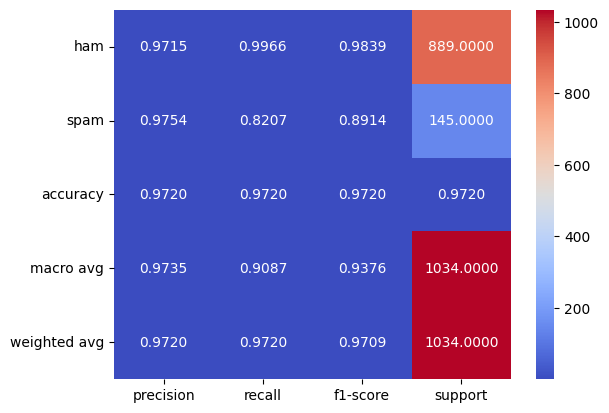

In [7]:
# Define the KNN classifier
class KNN:
    def __init__(self, k=3, distance_measure='euclidean'):
        self.k = k
        self.distance_measure = distance_measure

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        if self.distance_measure == 'euclidean':
            distances = [np.sqrt(np.sum((x_train - x) ** 2))
                         for x_train in self.X_train]
        elif self.distance_measure == 'manhattan':
            distances = [np.sum(np.abs(x_train - x))
                         for x_train in self.X_train]
        elif self.distance_measure == 'cosine_similarity':
            distances = [-np.dot(x, x_train) / (np.linalg.norm(x) * np.linalg.norm(x_train) + 1e-7)
                         for x_train in self.X_train]
        else:
            raise ValueError('Distance measure not supported')

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.Y_train[i] for i in k_indices]

        # return the most common class label
        labels, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common = labels[np.argmax(counts)]
        return most_common

    def get_params(self, deep=True):
        return {'k': self.k, 'distance_measure': self.distance_measure}


# Define the hyperparameters
k = [3, 5, 7, 9]
distance_measure = ['euclidean', 'manhattan', 'cosine_similarity']
best_k = None
best_distance_measure = None
best_score = 0

# Perform grid search
for k_val in k:
    for dist_measure in distance_measure:
        knn = KNN(k=k_val, distance_measure=dist_measure)
        score = cross_validate(knn, X_train, Y_train, cv=5, scoring='accuracy')['test_score'].mean()
        print(f'k={k_val}, distance_measure={dist_measure}, accuracy={score}')
        if score > best_score:
            best_score = score
            best_k = k_val
            best_distance_measure = dist_measure

# Instantiate the KNN classifier
knn = KNN(k=3, distance_measure='cosine_similarity')

# Fit the classifier
knn.fit(X_train, Y_train)

# Predict the test set
knn_predictions = knn.predict(X_test)

# Calculate the accuracy
knn_accuracy = np.mean(knn_predictions == Y_test)
print(f'Accuracy: {knn_accuracy}')

# Evaluate the classifier
knn_report = classification_report(Y_test, knn_predictions, output_dict=True)
sns.heatmap(pd.DataFrame(knn_report).transpose(), fmt='.4f', annot=True, cmap='coolwarm')


# Least Squares Classifier

Accuracy: 0.9332688588007737


<Axes: >

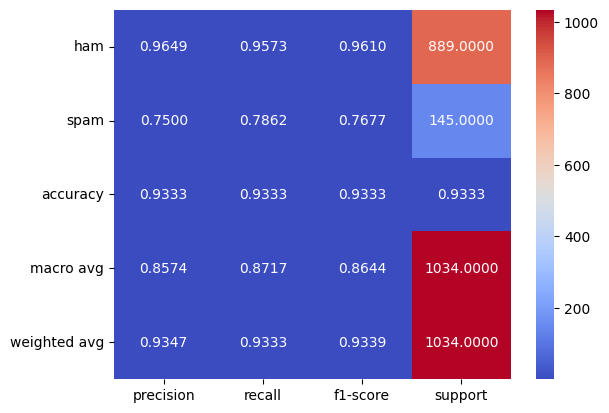

In [8]:
# Define the Least Squares classifier
class LeastSquares:
    def __init__(self):
        self.X_train = None
        self.Y_train = None
        self.W = None

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
        self.W = {}
        classes = np.unique(Y)
        for cls in classes:
            Y_cls = np.where(self.Y_train == cls, 1, 0)
            self.W[cls] = self.msse(np.c_[self.X_train, np.ones(len(self.X_train))], Y_cls)

    def msse(self, X, Y):
        return np.linalg.pinv(X.T @ X) @ X.T @ Y

    def predict(self, X):
        predictions = [self._predict(x) for x in np.c_[X, np.ones(len(X))]]
        return np.array(predictions)

    def _predict(self, x):
        classes = np.unique(self.Y_train)
        predictions = np.zeros(len(classes))
        for i, cls in enumerate(classes):
            predictions[i] = self.W[cls] @ x
        return classes[np.argmax(predictions)]


# Instantiate the Least Squares classifier
ls = LeastSquares()

# Fit the classifier
ls.fit(X_train, Y_train)

# Predict the test set
ls_predictions = ls.predict(X_test)

# Calculate the accuracy
ls_accuracy = np.mean(ls_predictions == Y_test)
print(f'Accuracy: {ls_accuracy}')

# Evaluate the classifier
ls_report = classification_report(Y_test, ls_predictions, output_dict=True)
sns.heatmap(pd.DataFrame(ls_report).transpose(), fmt='.4f', annot=True, cmap='coolwarm')


# Decision Tree Classifier

max_depth=3, accuracy=0.9344619105199516
max_depth=5, accuracy=0.9463119709794438
max_depth=7, accuracy=0.9499395405078597
max_depth=9, accuracy=0.9540507859733978
Accuracy: 0.960348162475822


<Axes: >

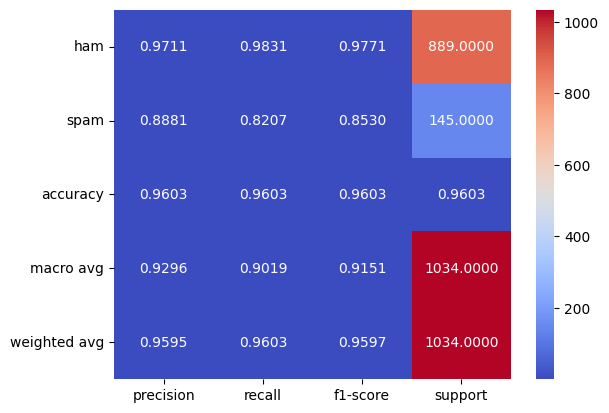

In [9]:
# Define the Decision Tree classifier
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
        self.tree = self._build_tree(self.X_train, self.Y_train, self.max_depth)

    def _build_tree(self, X, Y, depth):
        n_samples, n_features = X.shape
        classes, counts = np.unique(Y, return_counts=True)

        # Stopping criteria
        if len(classes) == 1:
            return classes[0]
        if depth == 0:
            return classes[np.argmax(counts)]

        # Find the best split
        best_gini = 1
        best_feature = None
        best_threshold = None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                Y_left = Y[X[:, feature] < threshold]
                Y_right = Y[X[:, feature] >= threshold]
                gini = (len(Y_left) * self._gini(Y_left) + len(Y_right) * self._gini(Y_right)) / n_samples
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        # Recursively split the data
        X_left = X[X[:, best_feature] < best_threshold]
        Y_left = Y[X[:, best_feature] < best_threshold]
        X_right = X[X[:, best_feature] >= best_threshold]
        Y_right = Y[X[:, best_feature] >= best_threshold]
        tree = {(best_feature, best_threshold): {}}
        tree[(best_feature, best_threshold)]['left'] = self._build_tree(X_left, Y_left, depth - 1)
        tree[(best_feature, best_threshold)]['right'] = self._build_tree(X_right, Y_right, depth - 1)

        return tree

    def _gini(self, Y):
        classes = np.unique(Y)
        n_samples = len(Y)
        gini = 1
        for cls in classes:
            p_cls = len(Y[Y == cls]) / n_samples
            gini -= p_cls ** 2
        return gini

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        node = self.tree
        while isinstance(node, dict):
            feature, threshold = list(node.keys())[0]
            if x[feature] < threshold:
                node = node[(feature, threshold)]['left']
            else:
                node = node[(feature, threshold)]['right']
        return node

    def get_params(self, deep=True):
        return {'max_depth': self.max_depth}


# Define the hyperparameters
max_depth = [3, 5, 7, 9]
best_max_depth = None
best_score = 0

# Perform grid search
for depth in max_depth:
    dt = DecisionTree(max_depth=depth)
    score = cross_validate(dt, X_train, Y_train, cv=5, scoring='accuracy')['test_score'].mean()
    print(f'max_depth={depth}, accuracy={score}')
    if score > best_score:
        best_score = score
        best_max_depth = depth

# Instantiate the Decision Tree classifier
dt = DecisionTree(max_depth=9)

# Fit the model
dt.fit(X_train, Y_train)

# Predict the test set
dt_predictions = dt.predict(X_test)

# Calculate the accuracy
dt_accuracy = np.mean(dt_predictions == Y_test)
print(f'Accuracy: {dt_accuracy}')

# Evaluate the classifier
dt_report = classification_report(Y_test, dt_predictions, output_dict=True)
sns.heatmap(pd.DataFrame(dt_report).transpose(), fmt='.4f', annot=True, cmap='coolwarm')


# Naive Bayes Classifier

Accuracy: 0.9458413926499033


<Axes: >

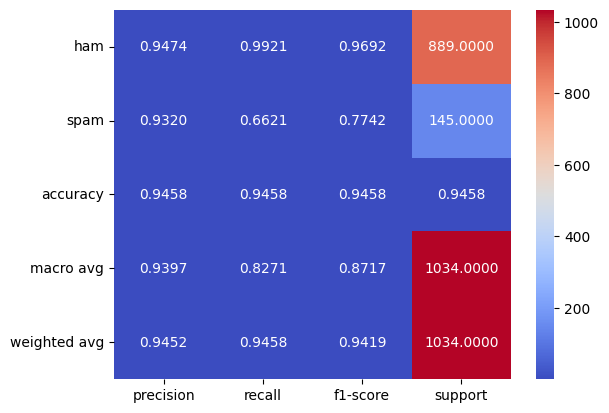

In [10]:
# Define the Naive Bayes classifier
class NaiveBayes:
    def __init__(self):
        self.priors = None
        self.likelihoods = None

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
        self.priors = {cls: np.mean(Y == cls) for cls in np.unique(self.Y_train)}
        self.likelihoods = {cls: X[Y == cls].sum(axis=0) / X[Y == cls].sum() for cls in np.unique(self.Y_train)}

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        posteriors = {}
        for cls in np.unique(self.Y_train):
            prior = self.priors[cls]
            likelihood = np.prod(self.likelihoods[cls] ** x)
            posteriors[cls] = prior * likelihood
        return max(posteriors, key=posteriors.get)


# Instantiate the Naive Bayes classifier
nb = NaiveBayes()

# Fit the model
nb.fit(X_train, Y_train)

# Predict the test set
nb_predictions = nb.predict(X_test)

# Calculate the accuracy
nb_accuracy = np.mean(nb_predictions == Y_test)
print(f'Accuracy: {nb_accuracy}')

# Evaluate the classifier
nb_report = classification_report(Y_test, nb_predictions, output_dict=True)
sns.heatmap(pd.DataFrame(nb_report).transpose(), fmt='.4f', annot=True, cmap='coolwarm')


# Random Forest & nn

Accuracy: 0.9729206963249516


<Axes: >

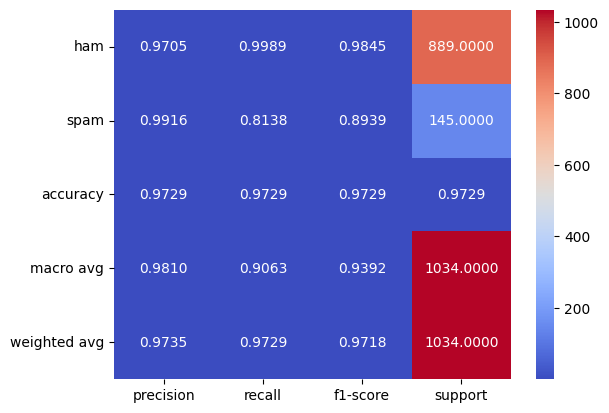

In [13]:
# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, Y_train)

# Predict the test set
rf_predictions = rf.predict(X_test)

# Calculate the accuracy
rf_accuracy = np.mean(rf_predictions == Y_test)
print(f'Accuracy: {rf_accuracy}')

# Evaluate the classifier
rf_report = classification_report(Y_test, rf_predictions, output_dict=True)
sns.heatmap(pd.DataFrame(rf_report).transpose(), fmt='.4f', annot=True, cmap='coolwarm')


Accuracy: 0.9816247582205029


<Axes: >

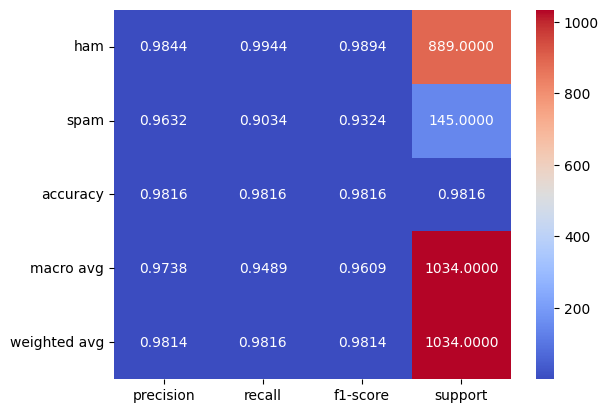

In [12]:

# Instantiate the Neural Network classifier
nn = MLPClassifier(activation='logistic')

# Fit the model
nn.fit(X_train, Y_train)

# Predict the test set
nn_predictions = nn.predict(X_test)

# Calculate the accuracy
nn_accuracy = np.mean(nn_predictions == Y_test)
print(f'Accuracy: {nn_accuracy}')

# Evaluate the classifier
nn_report = classification_report(Y_test, nn_predictions, output_dict=True)
sns.heatmap(pd.DataFrame(nn_report).transpose(), fmt='.4f', annot=True, cmap='coolwarm')

In [12]:
# simple predict() function to predict the class of a single instance
def predict(message_sample):
    message_sample = extract_features(test=preprocessing(pd.Series(message_sample)))
    knn_prediction = knn.predict(message_sample)[0]
    ls_prediction = ls.predict(message_sample)[0]
    dt_prediction = dt.predict(message_sample)[0]
    nb_prediction = nb.predict(message_sample)[0]
    rf_prediction = rf.predict(message_sample)[0]
    nn_prediction = nn.predict(message_sample)[0]

    return pd.Series(
        {'KNN': knn_prediction, 'LS': ls_prediction, 'DT': dt_prediction, 'NB': nb_prediction, 'RF': rf_prediction,
         'NN': nn_prediction})


messages = ['Congratulations! You have been selected as a winner. Text WON to 44255 to claim your prize.',
            'Hey, how are you?']
results = []
for message in messages:
    results.append(predict(message))
pd.DataFrame(results, index=messages)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,KNN,LS,DT,NB,RF,NN
Congratulations! You have been selected as a winner. Text WON to 44255 to claim your prize.,spam,spam,spam,spam,spam,spam
"Hey, how are you?",ham,ham,ham,ham,ham,ham
